<a href="https://colab.research.google.com/github/merkington/horror/blob/main/runtime_score_votes_horror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    1309.000000
mean       97.248281
std        13.766408
min        45.000000
25%        89.000000
50%        95.000000
75%       103.000000
max       192.000000
Name: runtime, dtype: float64


<BarContainer object of 86 artists>

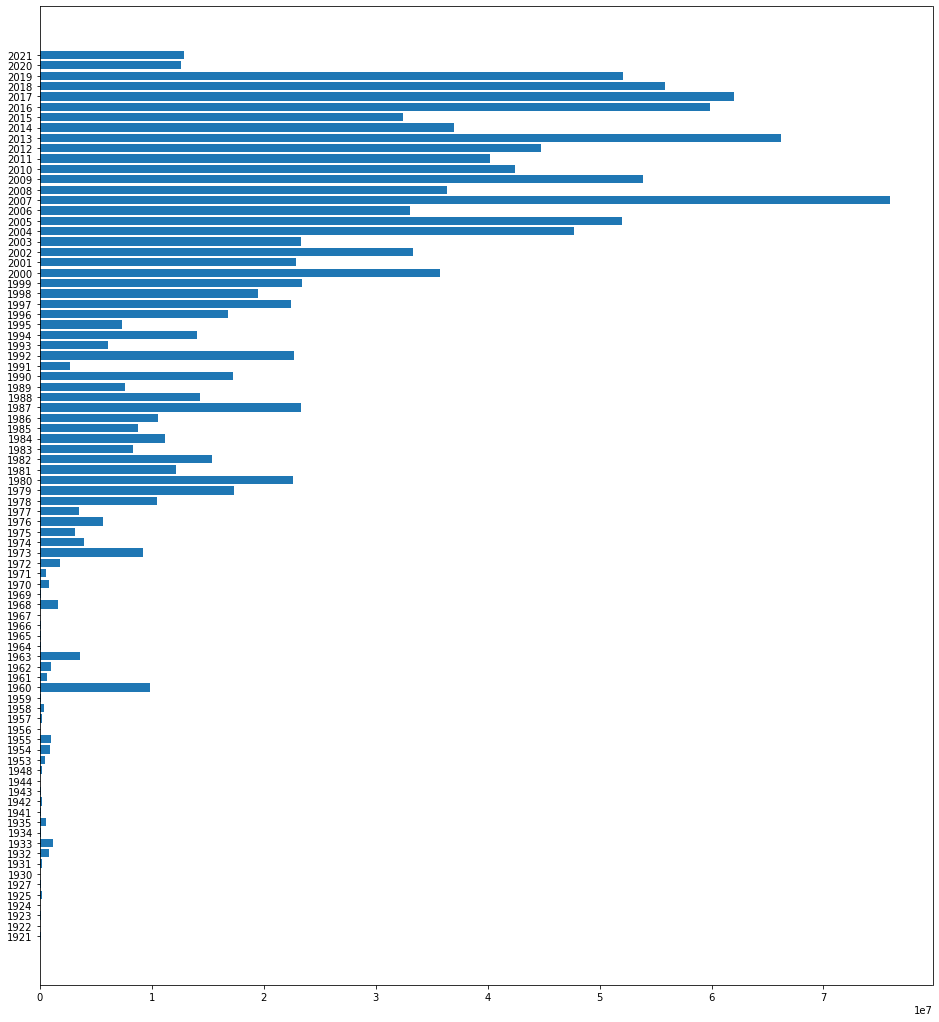

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# read the horror dataset from a URL
url = "https://raw.githubusercontent.com/merkington/fffff/main/horror.csv"
horror = pd.read_csv(url)
horror = horror.dropna()

# extract the year, rating, and votes columns
year = horror['year']
rating = horror['rating']
votes = horror['votes']

# calculate the average of votes/rating for each year
avr = horror.groupby('year')['votes'].sum() / horror.groupby('year')['rating'].sum()


Year = horror['year'].value_counts()
cutoff = Year.quantile(0.9)
Year = Year[Year >= cutoff]

horror['runtime'] = horror['runtime'].str.replace('min', '')
horror['runtime'] = horror['runtime'].astype('int')
alr = horror.groupby('year')['runtime'].sum() / (horror.groupby('year')['rating'].sum() / horror.groupby('year')['votes'].sum())
print(horror['runtime'].describe())

fig = plt.figure(figsize=(16, 18))
plt.barh(alr.index, alr)

